In [1]:
from numpy import *
A = array([[1,2,3],[4,5,6],[7,8,9]])
print(A)
print(A[:,0])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 4 7]


In [2]:
# a. (Extraneous)

import numpy as np
from numpy.linalg import norm

A = array([[2,-1,0],[-1,2,-1],[0,-1,2]]) 


a = [A[:,i] for i in range(3)]
u = [  ]
q = []

u.append(a[0])
q.append(u[0]/norm(u[0]))


u.append( a[1] - (dot(q[0],a[1])*q[0]) )
q.append( u[1]/norm(u[1]) )

u.append( a[2] - (dot(q[0],a[2])*q[0]) - (dot(q[1],a[2])*q[1]) )
q.append(u[2]/norm(u[2]))


Q = transpose(array([q[0],q[1],q[2]]))



R = array( [[norm(u[0]), dot(q[0],a[1]), dot(q[0],a[2]) ],
            [ 0, norm(u[1]), dot(q[1],a[2]) ], 
            [ 0,0,norm(u[2]) ]] )

k = 1
K = array([[2*k, -k,0],[-k,2*k,-k],[0,-k,2*k]])

print("Check that QR = A: ",Q@R)



Check that QR = A:  [[ 2.00000000e+00 -1.00000000e+00 -5.55111512e-17]
 [-1.00000000e+00  2.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00 -1.00000000e+00  2.00000000e+00]]


In [3]:
from numpy.linalg import eig
K = array([[2, -1,0],[-1,2,-1],[0,-1,2]])
vals,vecs = eig(K)
print(vecs)

[[-5.00000000e-01 -7.07106781e-01  5.00000000e-01]
 [ 7.07106781e-01  4.05925293e-16  7.07106781e-01]
 [-5.00000000e-01  7.07106781e-01  5.00000000e-01]]


In [9]:
# b. 

import matplotlib.pyplot as plt
from numpy.linalg import inv,eig

omega0 = sqrt(2)
omega1 = sqrt(2 + sqrt(2))
omega2 = sqrt(2 - sqrt(2))


eigmat = array([[-1,0,1],
           [0,-sqrt(2),sqrt(2)],
           [1,1,1]])



x0 = array([.2,0,-.2])
# x0 = transpose(x0)
A = inv(eigmat)@x0 


print(A)



def x1(t): 
    return 1 + A[0]* eigmat[0,0]*cos(omega0*t) + A[1]* eigmat[0,1]*cos(omega1*t)+ A[2]* eigmat[0,2]*cos(omega2*t)

def x2(t): 
    return 2 + A[0]* eigmat[1,0]*cos(omega0*t) + A[1]* eigmat[1,1]*cos(omega1*t)+ A[2]* eigmat[1,2]*cos(omega2*t)

def x3(t): 
    return 3 + A[0]* eigmat[2,0]*cos(omega0*t) + A[1]* eigmat[2,1]*cos(omega1*t)+ A[2]* eigmat[2,2]*cos(omega2*t)

print(A)

t = linspace(0,10,10000)

x1t = x1(t)
x2t = x2(t)
x3t = x3(t)

fig,ax = plt.subplots()

ax.plot(t,x1t)
ax.plot(t,x2t)
ax.plot(t,x3t)

[-0.2  0.   0. ]
[-0.2  0.   0. ]


In [10]:
from rk4stuff import rk4

tpoints = linspace(0,10,1000)
x = array([.2,0,-.2,0,0,0])
# x = array([.3,.2,-.4,.2,-.1,.4])


def dx(x,t,k=1,m=1): # input pos, time, params   output derivatives
    x0 = x[0]
    x1 = x[1]
    x2 = x[2]
    x0d = x[3]
    x1d = x[4]
    x2d = x[5]
    fx0 = x0d
    fx1 = x1d
    fx2 = x2d
    K = array([[2*k, -k,0],[-k,2*k,-k],[0,-k,2*k]])
    M = array( [[m,0,0],[0,m,0],[0,0,m]] )    
    f = -inv(M)@K@array( [x0,x1,x2] )
    fx0d = f[0]
    fx1d = f[1]
    fx2d = f[2]
    return array( [fx0,fx1,fx2,fx0d,fx1d,fx2d] )

xpoints = []
N = 10000
tpoints = linspace(0,10,N)

for t in tpoints: 
    x = rk4(x,t,10/N,dx,1,1)
    xpoints.append(x)
# del xpoints[-1]
xpoints = array(xpoints)
fig,ax2 = plt.subplots()

x1points = xpoints[:,0] + 1
x2points = xpoints[:,1] + 2
x3points = xpoints[:,2] + 3

ax2.plot(tpoints,x1points)
ax2.plot(tpoints,x2points)
ax2.plot(tpoints,x3points)


    

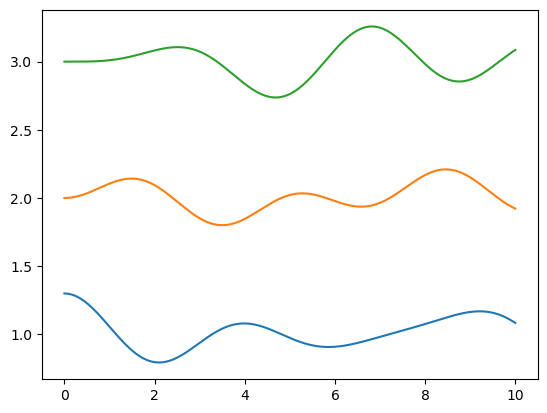

In [11]:
from rk4stuff import rk4

tpoints = linspace(0,10,1000)
x = array([.3,0,0,0,0,0])
# x = array([.3,.2,-.4,.2,-.1,.4])


def dx(x,t,k=1,m=1): # input pos, time, params   output derivatives
    x0 = x[0]
    x1 = x[1]
    x2 = x[2]
    x0d = x[3]
    x1d = x[4]
    x2d = x[5]
    fx0 = x0d
    fx1 = x1d
    fx2 = x2d
    K = array([[2*k, -k,0],[-k,2*k,-k],[0,-k,2*k]])
    M = array( [[m,0,0],[0,m,0],[0,0,m]] )    
    f = -inv(M)@K@array( [x0,x1,x2] )
    fx0d = f[0]
    fx1d = f[1]
    fx2d = f[2]
    return array( [fx0,fx1,fx2,fx0d,fx1d,fx2d] )

xpoints = []
N = 10000
tpoints = linspace(0,10,N)

for t in tpoints: 
    x = rk4(x,t,10/N,dx,1,1)
    xpoints.append(x)
# del xpoints[-1]
xpoints = array(xpoints)
fig,ax2 = plt.subplots()

x1points = xpoints[:,0] + 1
x2points = xpoints[:,1] + 2
x3points = xpoints[:,2] + 3

ax2.plot(tpoints,x1points)
ax2.plot(tpoints,x2points)
ax2.plot(tpoints,x3points)


    

In [12]:
# f

from numpy.fft import fft

coef = fft(x1points)
coef2 = fft(x2points)
coef3 = fft(x3points)

fig,ax3 = plt.subplots()

# ax3.plot(range(len(coef)),abs(coef))
# ax3.plot(range(len(coef2)),abs(coef2))
# ax3.plot(range(len(coef3)),abs(coef3))

coef = np.delete(coef,0)
coef2 = np.delete(coef2,0)
coef3 = np.delete(coef3,0)

ax3.plot(range(len(coef)),abs(coef))
# ax3.plot(range(len(coef2)),abs(coef2))
# ax3.plot(range(len(coef3)),abs(coef3))

